# Univariate Analysis

# * This is the first step of the analysis
* Firstly we will apply Univariate Analysis on the numerical attributes of the data 
* We will use Histogram or Distplot for analysis of numerical attributes
* For the Categorical attributes of the data we will use Frequency Plot or count plot to visualize the data

In [ ]:
# Importing the Libraries to Start the Univariate Analysis

In [7]:
import numpy as np 
import pandas as pd
import scipy 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# for warnings
import warnings
warnings.filterwarnings('ignore')
#Plot dimension
plt.rcParams['figure.figsize']=[20,10]

In [ ]:
# Importing the data

In [4]:
sales=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [5]:
# Finding the list of numerical and categorical columns

In [6]:
nums=sales.select_dtypes(include=np.number).columns # np.number is used to fetch the numerical columns 
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Plotting the graph using Loop:

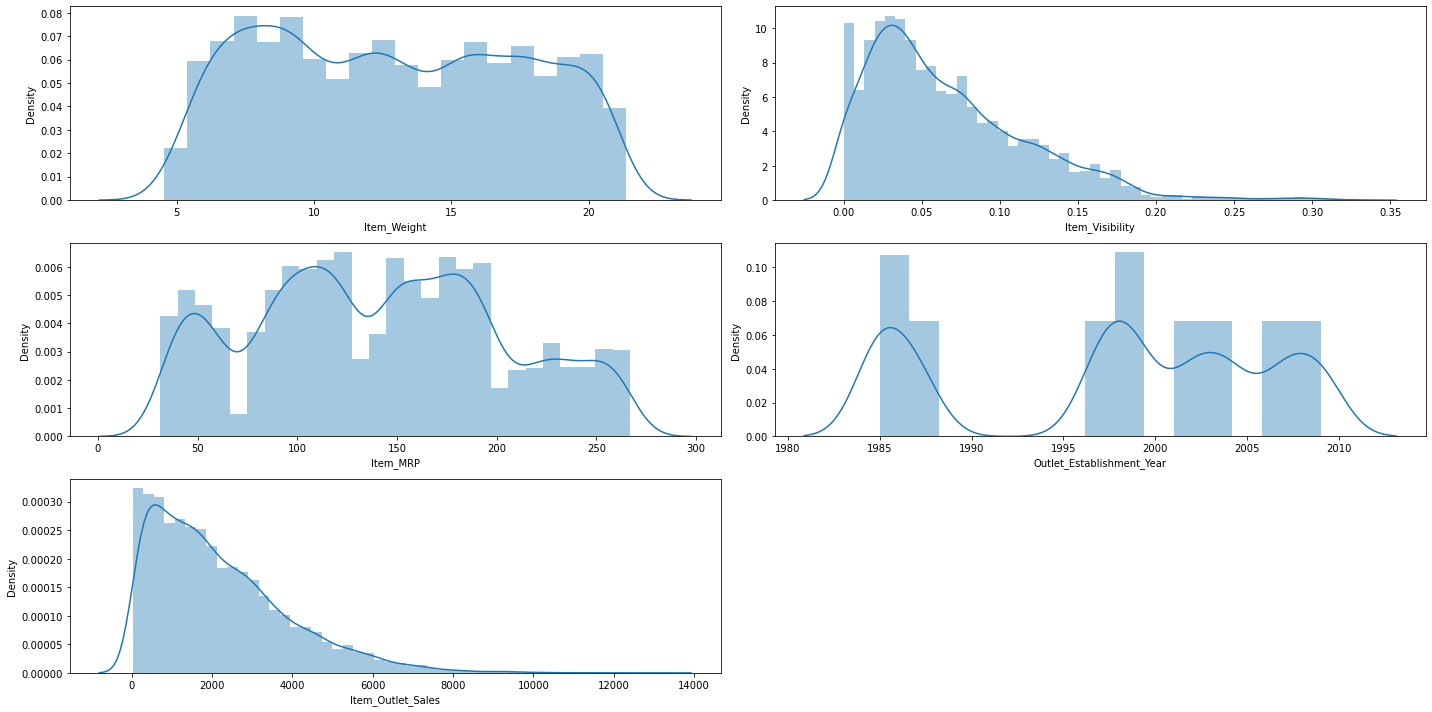

In [10]:
n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter) # Creating the space for 6 plots so the plots can be shown 
    sns.distplot(sales.loc[:,i].dropna()) # command for creating distplot using loop, i is iterating through the columns
                                          #.dropna()is used to drop the missing values in the columns
    counter+=1                            # Counter is used for iterator
plt.tight_layout()
plt.show()

# Infernces ::

* 1.Item outlet sales is positively skewed in nature
* 2.No pattern sen in outlet EST year
* 3.Item MRP is found to be multimodal in nature.
* 4.Item weight is uniform in nature

In [11]:
# Now Plotting the Categorical columns 

In [12]:
sales.head() # Checking the head of the data to check the categorical attributes

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Item fat content

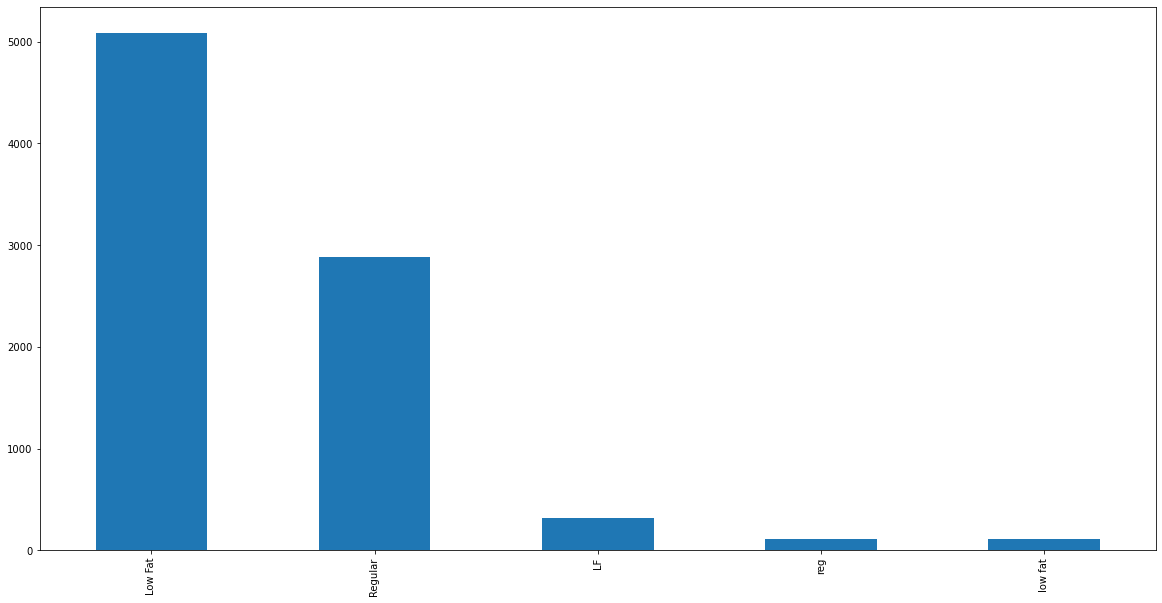

In [13]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')
plt.show()

# As we can see that in Item fat content there are only two categories
* 1.Low fat
* 2.Regular 
* But duplicate categories are there in the data so we have to replace and merge into each other

In [14]:
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

<AxesSubplot:>

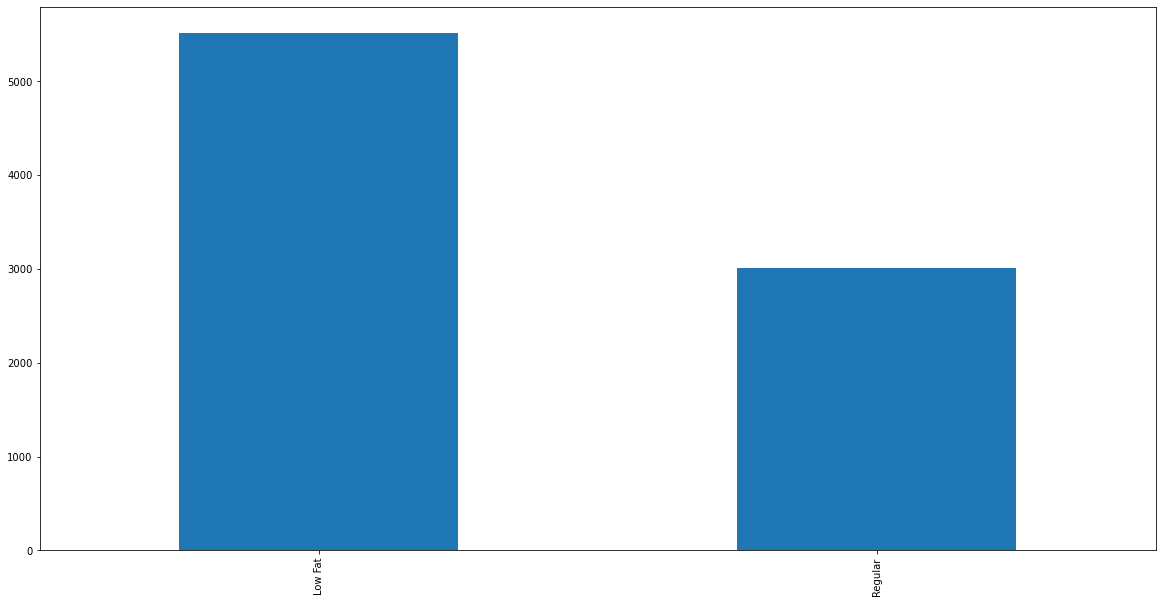

In [15]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')

In [16]:
# Now we can see there is only two categories.

# Item Type

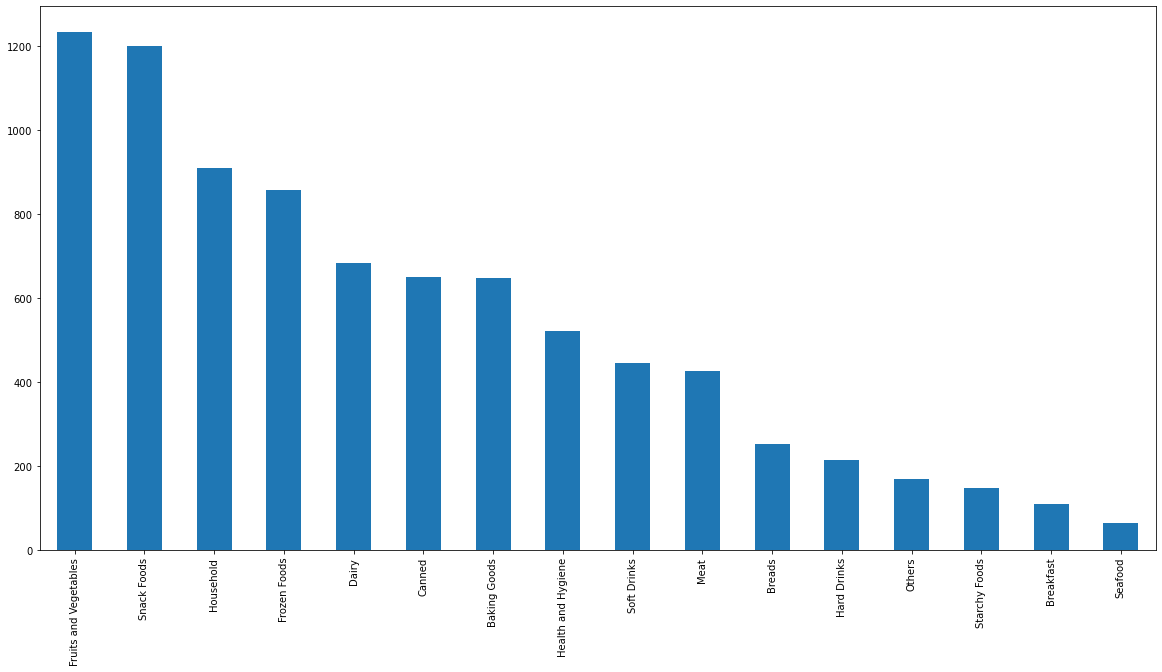

In [17]:
sales.Item_Type.value_counts().plot(kind='bar')
plt.show()

In [18]:
sales.Item_Type.value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

# Infrence::
* Top 5 selling product types are :
    
* 1.Fruits and Vegetables

* 2.Snack Foods

* 3.Household

* 4.Frozen Foods

* 5.Dairy

# Outlet_id

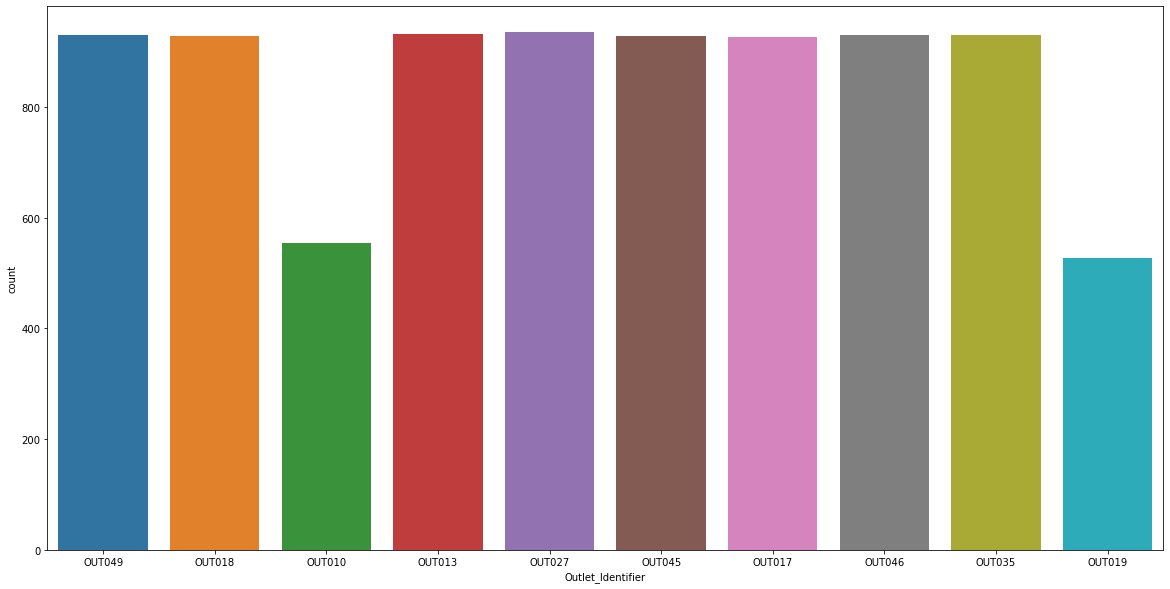

In [19]:
sns.countplot(sales.Outlet_Identifier)
plt.show()

# Hypothesis
* 1.The outlet 10 and 19 has the lowest sales as compared to other outlets 

In [20]:
# Now we will check our Hypothesis

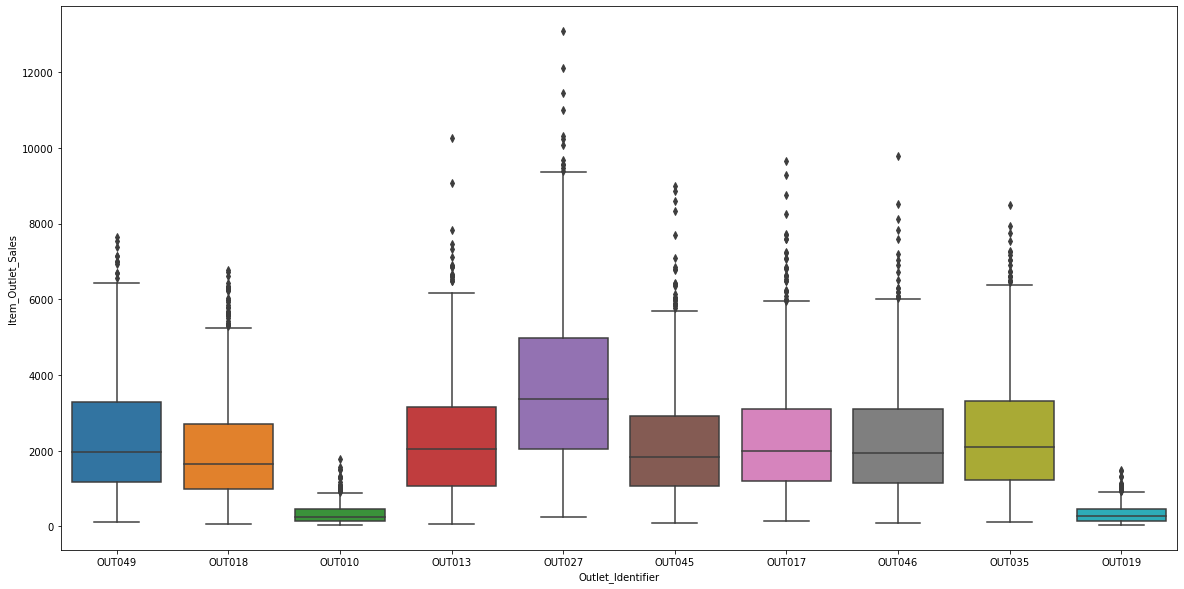

In [21]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)
plt.show()

# Inf::
* As we can see that the most performing outlet is OUT27

In [22]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# OUTLET SIZE

In [23]:
sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

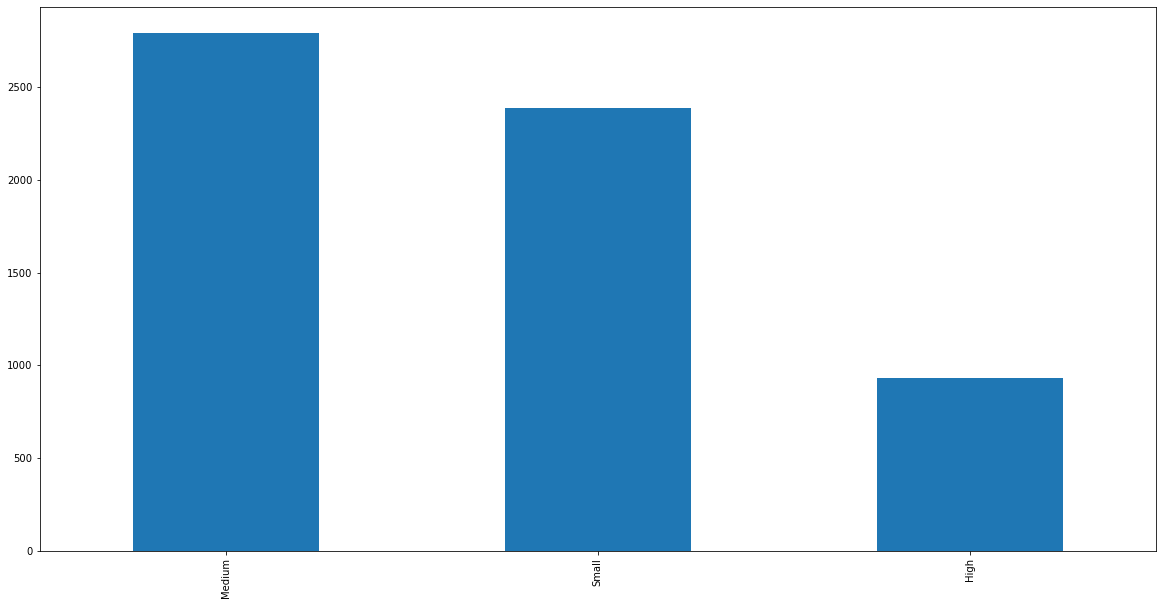

In [24]:
sales.Outlet_Size.value_counts().plot(kind='bar')

# Outlet Location Type 

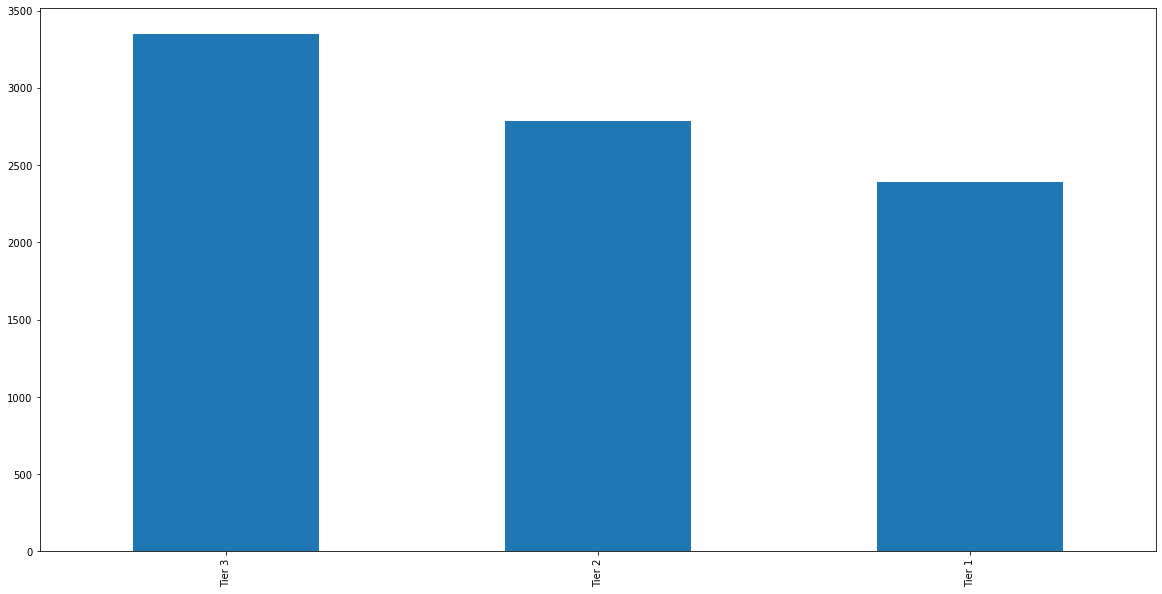

In [25]:
sales.Outlet_Location_Type.value_counts().plot(kind='bar')
plt.show()

# Infrence 
* 1.The company sales are mostly driven from the TIER 3 type of cities
* 2.The medium type stores drive the most of sales and profit

# Outlet_Type

<AxesSubplot:>

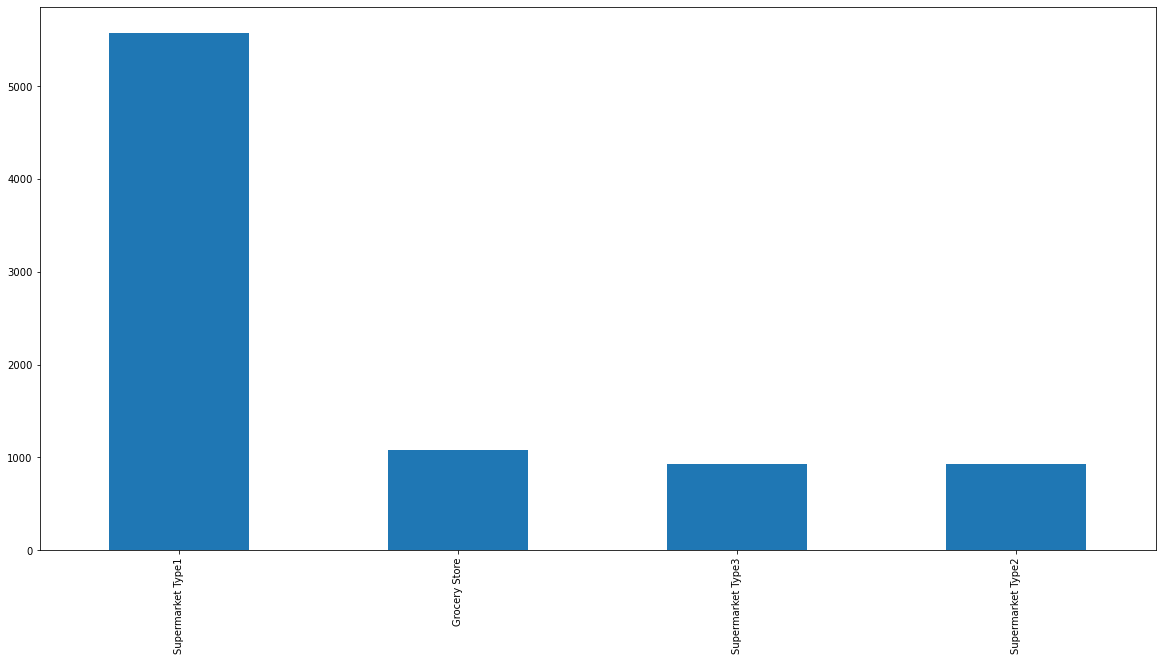

In [26]:
sales.Outlet_Type.value_counts().plot(kind='bar')

# Summary ::
* 1.Out 27 is the maximum revenue genrator for the buisness

* 2.We relaize this stores is the mostly opened in Tier 3 cities and the type of the outlet is medium size outlet

* 3.The items that are sold in the outlet are fruits and veggies,snacks,frozen, household followed by diary

* 4.Most of the items are genrally low fat and regular types 

* 5.The lowest performing outelets are out10 and out19 

* 6.Super market type 1 appear the most commonly seen outlet across the the locations 

# Here our Univariate analysis is completed 
# Now we will move on to the Bivariate analysis in the Next file 